In [1]:
import sys
sys.path.append('../')
import src.utils as utils
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
reload(utils)
import scipy.stats as stat

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
%config InlineBackend.figure_format = "retina"

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
np.random.seed(1)

## Brownian motion
$$
\left(W_t\right)_{t\in[0,1]}
$$


In [5]:
BM = utils.BrownianMotion(T = 1, Nt = 1_000)

In [6]:
sims = BM.simulate(nsims = 3)
time = BM.timesteps

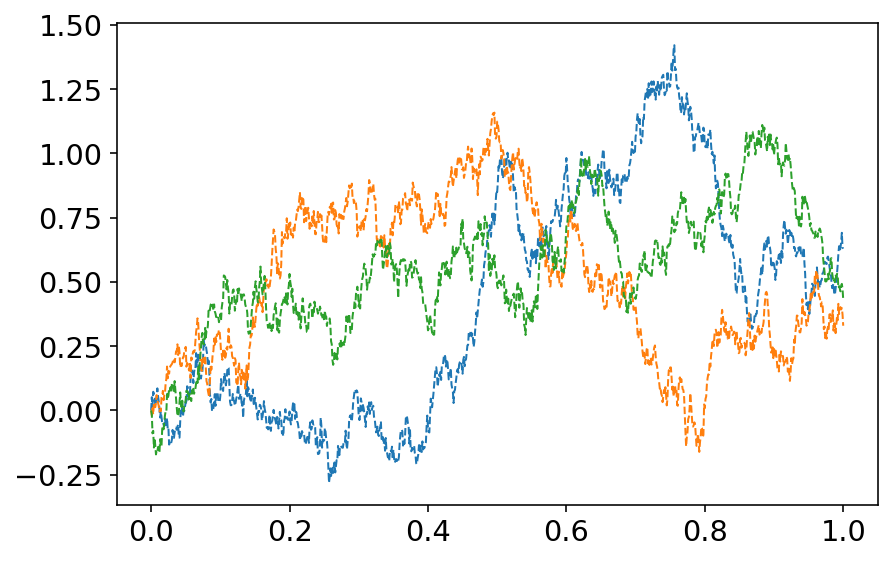

In [7]:
plt.figure()
plt.plot(time, sims, linestyle = '--', linewidth = 1.0)
resolution_value = 50
plt.tight_layout()
plt.savefig('../figures/sample_path_Brownian_motion.pdf', format="pdf", dpi=resolution_value)
plt.show()

## Geometric Brownian motion
$$
\left(S_t\right)_{t\in[0,1]}
$$
where 
$$
S_t = S_0 \,e^{\left(\mu - \frac12 \sigma^2\right)\,t + \sigma\, W_t}
$$

In [8]:
GBM = utils.GeometricBrownianMotion(x0 = 100, mu = 0.01, sigma = 0.05, T = 1, Nt = 1_000)

In [9]:
sims = GBM.simulate(nsims = 3)
time = GBM.timesteps

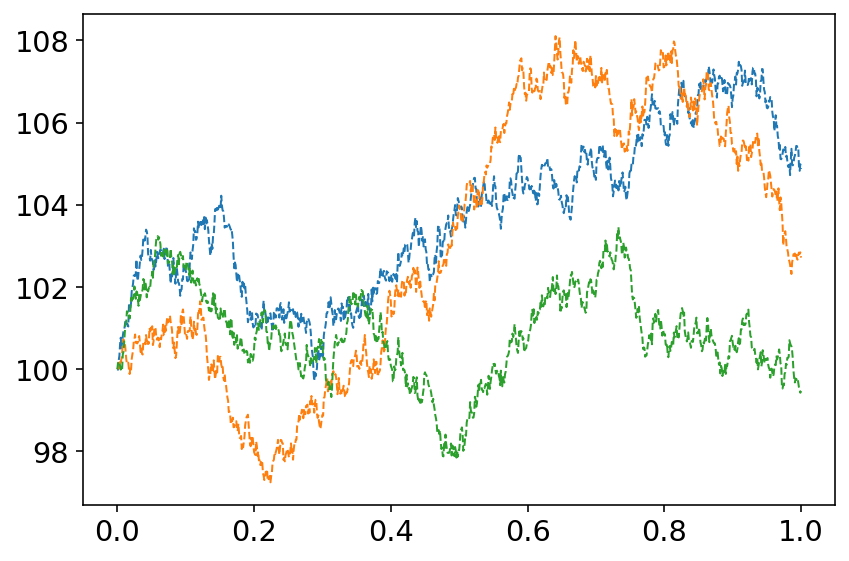

In [10]:
plt.figure()
plt.plot(time, sims, linestyle = '--', linewidth = 1.0)
resolution_value = 50
plt.tight_layout()
plt.savefig('../figures/sample_path_Geometric_Brownian_motion.pdf', format="pdf", dpi=resolution_value)
plt.show()

In [11]:
def call_option_payoff(K, S):
    return np.maximum(S-K,0)

In [12]:
def computeBlackScholesCallPrice(t,T,S,r,sigma,K):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*(T-t))/(sigma * np.sqrt(T-t))
    d2 = d1 - sigma* np.sqrt(T-t)
    return S*stat.norm.cdf(d1) - K*np.exp(-r*(T-t))*stat.norm.cdf(d2)

In [13]:
K = 100
S = np.linspace(start = 80,stop = 120, num = 1000)
t = 0
T = 1
r = 0.03
sigma = 0.1
K = 100
prices = computeBlackScholesCallPrice(t,T,S,r,sigma,K)
payoff = call_option_payoff(K = K, S = S)

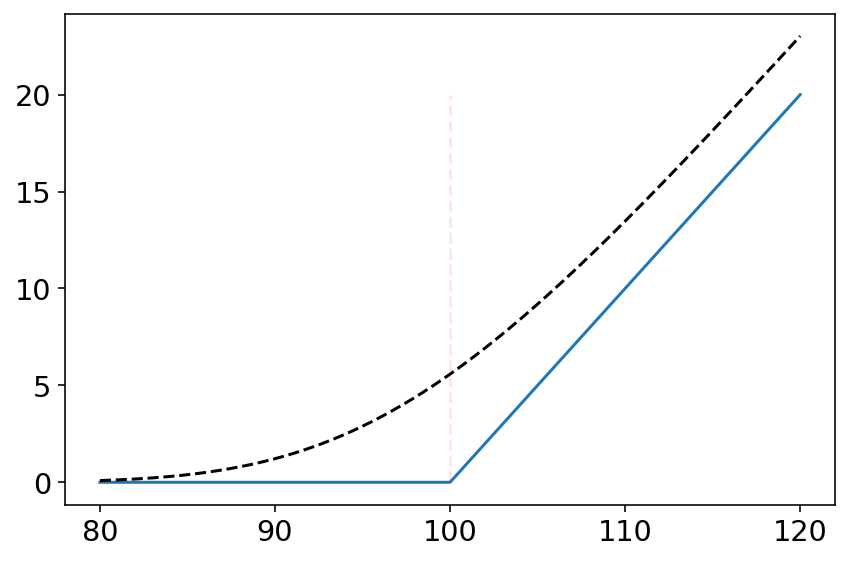

In [14]:
plt.figure()
plt.plot(S, payoff, linestyle = '-')
plt.plot(S, prices, linestyle = '--', color='black')
plt.vlines(x = K, ymin = 0, ymax = np.max(payoff), color = 'r', linestyles='--', alpha = 0.1)
resolution_value = 50
plt.tight_layout()
plt.savefig('../figures/hockey_stick.pdf', format="pdf", dpi=resolution_value)
plt.show()